In [1]:
%matplotlib inline
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [15]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/shuttle-landing-control/shuttle-landing-control.data"
# load dataset into Pandas DataFrame

df = pd.read_csv(url, names=['Class','STABILITY','ERROR','SIGN','WIND', 'MAGNITUDE', 'VISIBILITY']) #'Class','STABILITY','ERROR','SIGN','WIND', 'MAGNITUDE', 'VISIBILITY'


In [16]:
print(df)

    Class STABILITY ERROR SIGN WIND MAGNITUDE  VISIBILITY
0       2         *     *    *    *         *           2
1       1         2     *    *    *         *           1
2       1         1     2    *    *         *           1
3       1         1     1    *    *         *           1
4       1         1     3    2    2         *           1
5       1         *     *    *    *         4           1
6       2         1     4    *    *         1           1
7       2         1     4    *    *         2           1
8       2         1     4    *    *         3           1
9       2         1     3    1    1         1           1
10      2         1     3    1    1         2           1
11      2         1     3    1    2         1           1
12      2         1     3    1    2         2           1
13      1         1     3    1    1         3           1
14      2         1     3    1    2         3           1


In [18]:
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

df2 = pd.read_excel('ENB2012_data.xlsx', names=['Relative Compactness','Surface Area',
                               'Wall Area','Roof Area','Overall Height', 'Orientation', 
                               'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']) 

print(df2)






     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing A

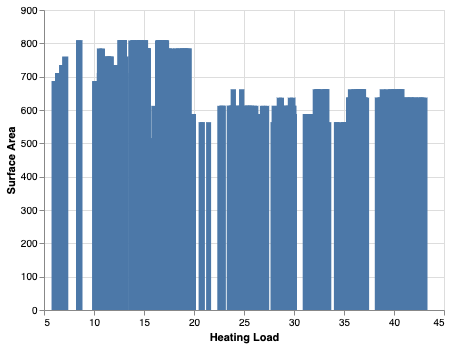

In [19]:
alt.Chart(df2).mark_bar().encode(
    x='Heating Load:Q',
    y='Surface Area:Q'
)

In [31]:
source = df2

highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(source).encode(
    x='Surface Area:Q',
    y='Heating Load:Q',
    color='Orentation'
)

points = base.mark_point().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_bar().encode(
    size=alt.condition(highlight, alt.value(3), alt.value(1))
)

points + lines

ValueError: Orentation encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.LayerChart(...)

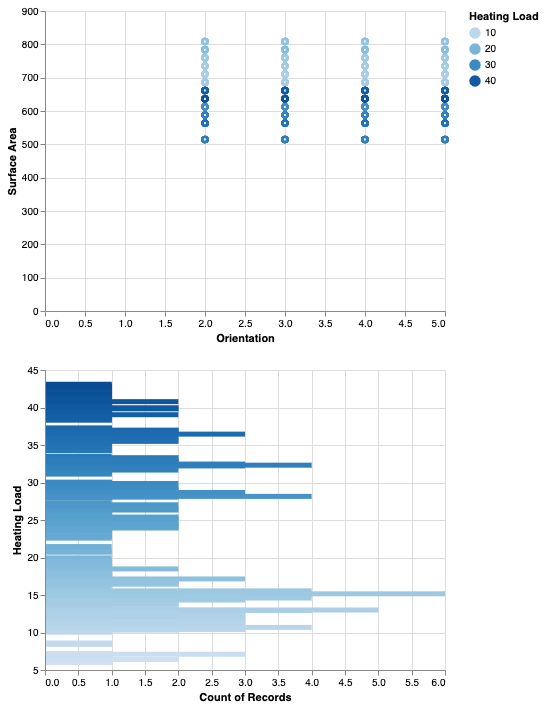

In [64]:
     

source = df2

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Orientation:Q',
    y='Surface Area:Q',
    color=alt.condition(brush, 
                        'Heating Load:Q',
                        alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Heating Load:Q',
    color='Heating Load:Q',
    x='count()'
).transform_filter(
    brush
)

alt.vconcat(points, bars)

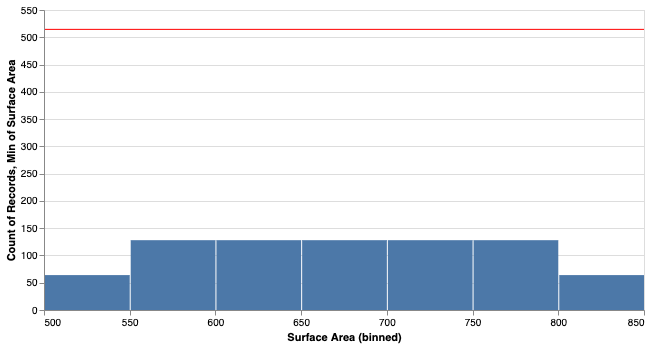

In [62]:
bars = alt.Chart(df2).mark_bar().encode(
    alt.X('Surface Area', bin=True),
    y='count()'
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='min(Surface Area)'
)

(bars + rule).properties(width=600)

In [35]:
rule = alt.Chart(source).mark_rule(color='red').encode(
    y='count()'
)

In [102]:
bars = alt.Chart(df2).mark_bar().encode(
    alt.X('Glazing Area Distribution', bin=True),
    y='count()'
)

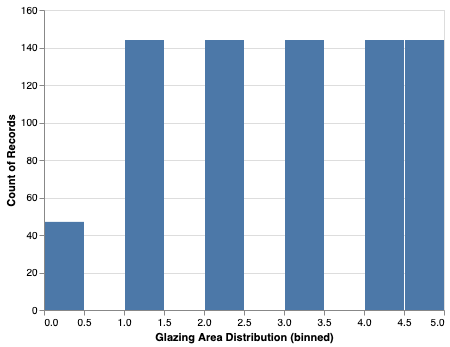

In [103]:
bars

In [58]:
bars = alt.Chart(df2).mark_bar().encode(
    alt.X('Heating Load', bin=True),
    y='count()'
)

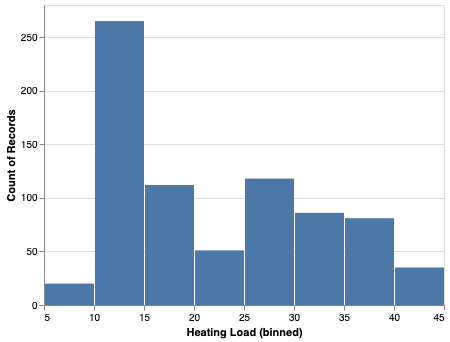

In [59]:
bars

In [70]:
df3 = pd.read_csv('wine.data', names=['CLASS','A', 'MA', 'ASH', 'AoA', 'M', 'TP', 'F', 'NP', 'P', 'CI', 'H', 'DIW', 'PRO']) #names=['Class','STABILITY','ERROR','SIGN','WIND', 'MAGNITUDE', 'VISIBILITY']

In [71]:
df3

,CLASS,A,MA,ASH,AoA,M,TP,F,NP,P,CI,H,DIW,PRO
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


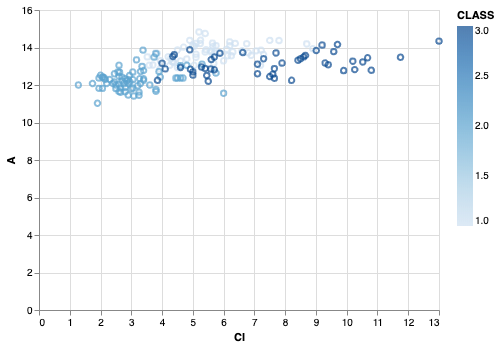

In [84]:
alt.Chart(df3).mark_point().encode(
    x='CI:Q',
    y='A:Q',
    #size='count()',
    color='CLASS',
)

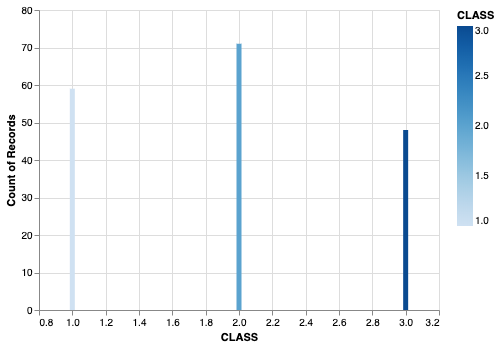

In [85]:
alt.Chart(df3).mark_bar().encode(
    x='CLASS',
    y='count()',
    #size='count()',
    color='CLASS',
)

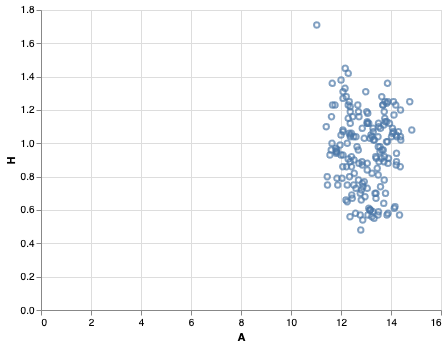

In [86]:
alt.Chart(df3).mark_point().encode(
    x='A:Q',
    y='H:Q'
)

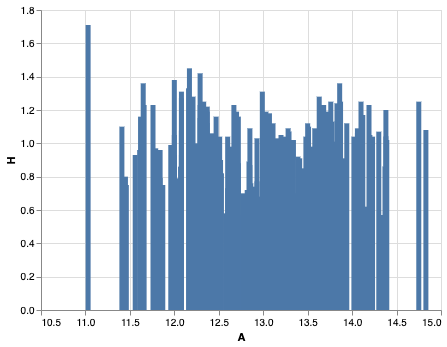

In [88]:
alt.Chart(df3).mark_bar().encode(
    x='A:Q',
    y='H:Q'
)

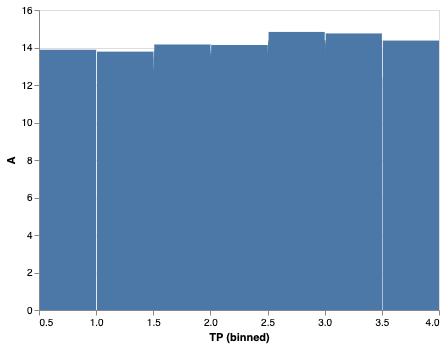

In [93]:
alt.Chart(df3).mark_bar().encode(
    alt.X('TP:Q', bin=True),
    y='A:Q'
)



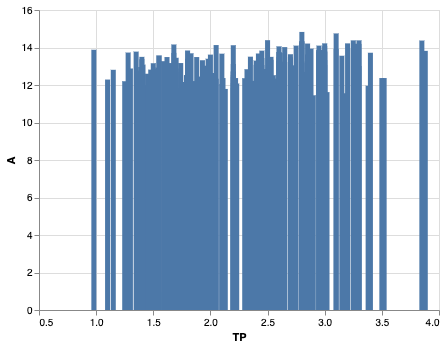

In [94]:
alt.Chart(df3).mark_bar().encode(
    alt.X('TP:Q', bin=False),
    y='A:Q'
)

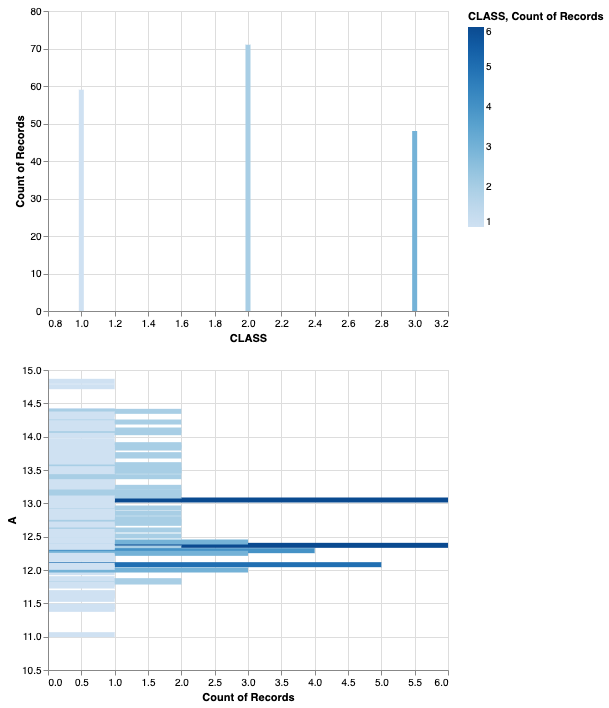

In [99]:
source = df3

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_bar().encode(
    x='CLASS:Q',
    y='count()',
    color=alt.condition(brush, 
                        'CLASS:Q',
                        alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='A:Q',
    color='count()',
    x='count()'
).transform_filter(
    brush
)

alt.vconcat(points, bars)

In [138]:
df5 = pd.read_excel('Real estate valuation data set.xlsx') #names=['Transaction Date','House Age','Nearest MRT Station','Convience Stores','Latitude', 'Longatude', 'House Price'] 
df5 = pd.read_excel('Real estate valuation data set.xlsx')
df5

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [122]:
alt.Chart(df5).mark_bar().encode(
    x='X2 house age',
    y='Y house price of unit area',
    color=alt.condition(
        alt.datum.'Y house price of unit area'.value > 60,
        alt.value('orange'),    # If statment is true, the bar will be orange.
        alt.value('steelblue')  # If statment not true, bar will be set to blue.

    )
).properties(width=600)

SyntaxError: invalid syntax (<ipython-input-122-6cc9303a8b00>, line 5)

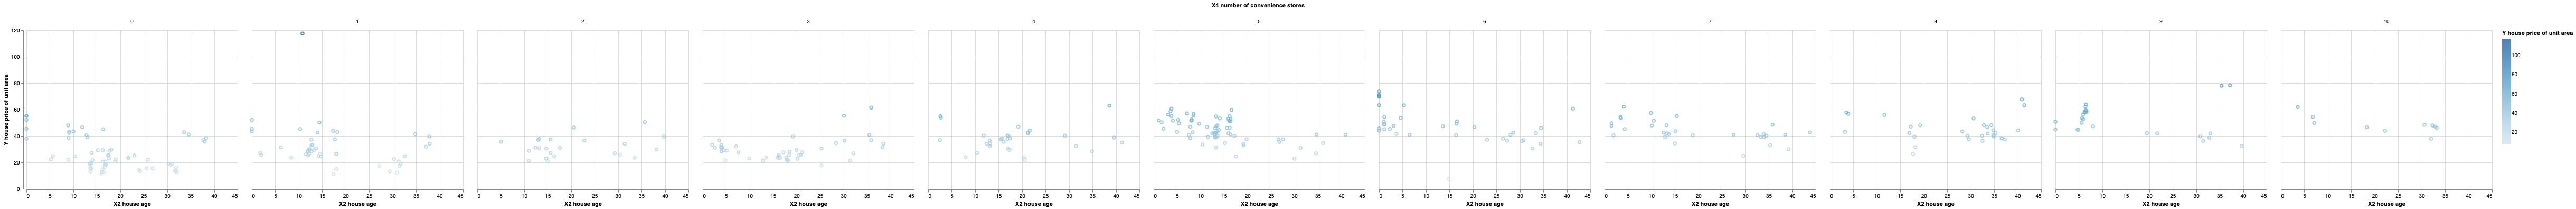

In [125]:
brush = alt.selection_interval()

alt.Chart(df5).mark_point().encode(
    x='X2 house age',
    y='Y house price of unit area',
    color=alt.condition(brush, 'Y house price of unit area', alt.value('lightgray')),
).properties(
    selection=brush
).facet(column='X4 number of convenience stores:Q')

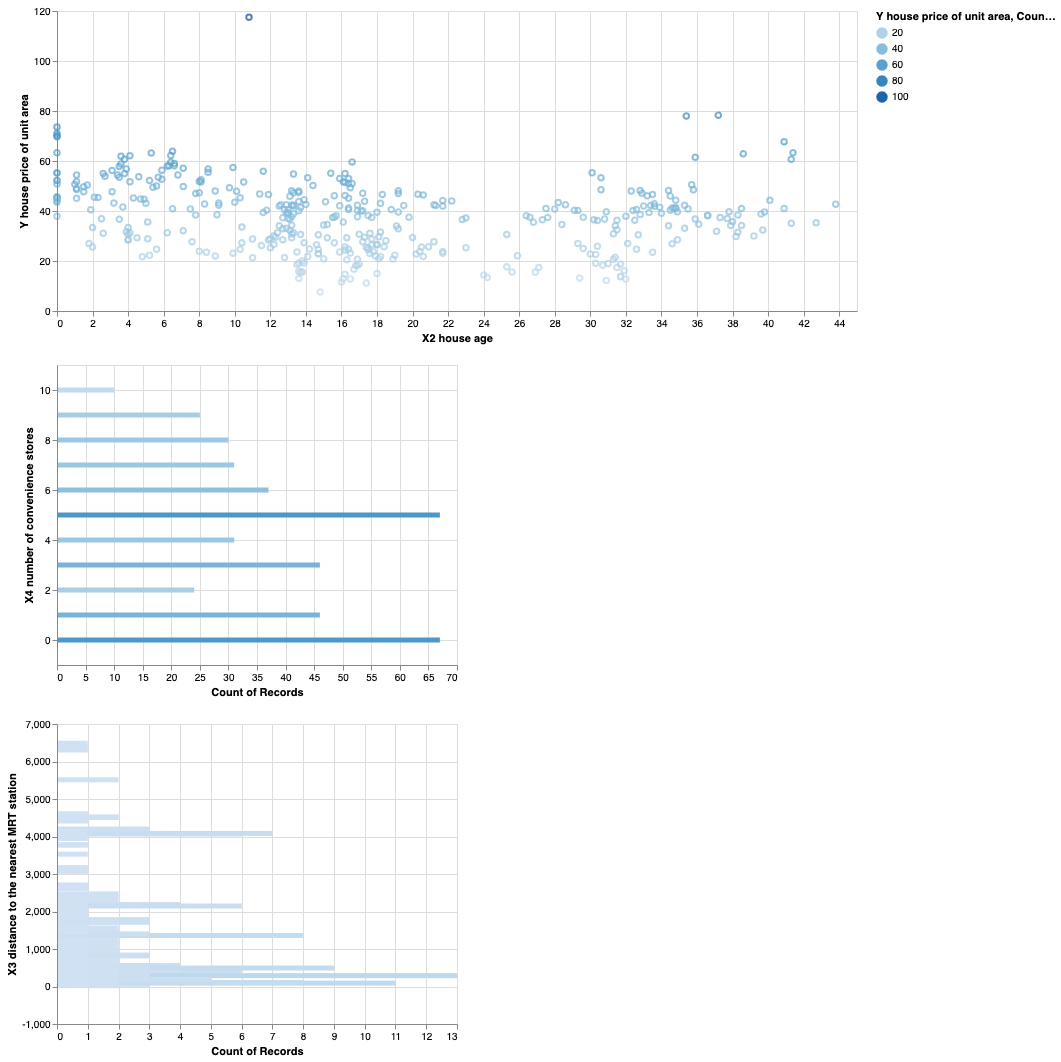

In [132]:
brush = alt.selection(type='interval')

# the top scatterplot
points = alt.Chart().mark_point().encode(
    x='X2 house age:Q',
    y='Y house price of unit area:Q',
    color=alt.condition(brush, 'Y house price of unit area:Q', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='X4 number of convenience stores:Q',
    color='count(Y house price of unit area)',
    x='count(*):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)

bars2 = alt.Chart().mark_bar().encode(
    y='X3 distance to the nearest MRT station:Q',
    color='count(Y house price of unit area)',
    x='count(*):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)

chart = alt.vconcat(points, bars, bars2, data=df5)
chart

In [133]:
base = alt.Chart(df5).mark_point().encode(
    x='X3 distance to the nearest MRT station:Q',
    y='X4 number of convenience stores:Q'
)

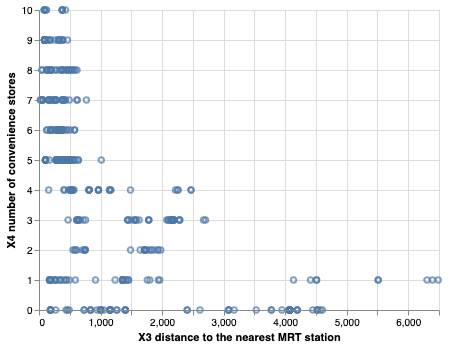

In [134]:
base